In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [2]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
MitoPW['UniProtIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

    # Collecting UniProt IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2UniprotID[gene]) == float : continue
        MitoPW.iloc[i,5] += name2UniprotID[gene].replace('|',',') + ','
    MitoPW.iloc[i,5] = MitoPW.iloc[i,5][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs,UniProtIDs
MitoPathway,,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0...","Q80VP5,Q14CH7,P0CB42,Q8K1C0,P28352,Q925I1,Q9DC..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0...","P28352,Q925I1,Q6ZQJ5,O08600,Q8C163,Q80ZH7,Q3U0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0...","Q6ZQJ5,Q8C163,Q80ZH7,Q9CXC3,Q3UG70,Q9QZM2,Q8BK..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0...","Q925I1,Q8CHZ9,B9EJ57,Q8BKY8,Q91VA6,Q3UG70,Q9QZ..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0...","P28352,Q8C163,Q80ZH7,O08760,Q8K409,Q3UG70,Q6P1..."
...,...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,O55125,Q7TMG8,Q99L..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,P97432,O55125,Q7TM..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"ENSMUSG00000036932,ENSMUSG00000020085,ENSMUSG0...","Q9Z0X1,Q8BUE4,Q3TY86,Q61337,O08734,Q07813,Q99M..."


# Plotting

In [3]:
PT = pd.read_csv(f'{Project}/Results/Other_papers/Martinez_etal.2023.Cell_Metabolism/Tables/Proteome/PT_Exp_calc/v20240416/Martinez_PT_Ncount_mito.tsv', sep='\t')
display(PT)

,uniprot_id,Brown_a,Brown_b,Brown_c,Brown_d,Brown_e,White_a,White_b,White_c,White_d,White_e,Beige_a,Beige_b,Beige_c,Beige_d,Beige_e
0,Q9D0M3,1.677607e+08,1.654406e+08,1.790292e+08,1.622928e+08,1.762542e+08,1.210049e+08,1.122204e+08,1.080367e+08,9.883392e+07,1.024552e+08,2.228455e+08,2.228162e+08,2.302019e+08,2.145728e+08,2.157005e+08
1,P35486,1.273375e+08,1.399905e+08,1.193958e+08,1.228001e+08,1.236803e+08,7.514387e+07,9.035415e+07,7.381185e+07,7.361203e+07,7.703798e+07,1.467053e+08,1.527416e+08,1.579745e+08,1.573370e+08,1.716266e+08
2,Q9D3D9,1.165518e+08,5.995183e+07,7.650882e+07,7.520879e+07,1.425586e+08,4.428402e+07,5.481979e+07,4.110463e+07,8.878801e+07,1.266069e+08,1.033326e+08,1.380933e+08,9.782730e+07,1.253734e+08,5.569637e+07
3,Q9DCB8,9.208312e+06,3.576136e+06,8.377321e+06,8.959335e+06,1.180327e+07,2.591575e+06,2.582400e+06,2.177322e+06,4.966576e+06,4.801538e+06,7.047817e+06,1.246932e+07,1.188492e+07,1.024324e+07,4.472947e+06
4,Q9D051,1.978939e+08,1.887704e+08,1.707588e+08,1.881961e+08,2.051131e+08,1.019148e+08,1.180484e+08,1.059435e+08,1.082637e+08,1.068639e+08,1.834213e+08,2.442295e+08,2.325722e+08,2.438389e+08,2.372745e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,P70677,6.092167e+06,6.546527e+06,6.204225e+06,5.987463e+06,6.435924e+06,1.259679e+07,1.350153e+07,1.494705e+07,1.469584e+07,1.422734e+07,3.760890e+06,3.639322e+06,3.645789e+06,3.727808e+06,3.800071e+06
696,Q61337,3.596575e+06,1.661687e+06,4.485281e+06,4.628030e+06,4.914523e+06,3.062080e+06,2.733221e+06,3.107135e+06,1.198425e+07,1.031094e+07,3.060661e+06,4.372030e+06,5.060402e+06,4.325682e+06,1.405396e+06
697,Q9D3P8,1.122043e+07,9.902465e+06,1.262549e+07,1.237305e+07,1.028312e+07,1.797361e+07,1.962424e+07,1.971989e+07,2.137834e+07,2.233617e+07,6.377046e+06,6.635729e+06,6.300833e+06,6.701076e+06,5.569582e+06
698,Q8BHS6,1.473347e+06,1.326232e+06,1.209259e+06,1.212153e+06,1.306434e+06,7.014594e+06,6.996330e+06,7.923604e+06,6.979710e+06,6.760304e+06,1.175390e+06,1.907584e+06,1.623834e+06,1.847765e+06,2.131587e+06


In [4]:
# Plot data
MTPWs = ['CI subunits',
         'CII subunits',
         'CIII subunits',
         'CIV subunits',
         'CV subunits']

celltypes = ['Beige','Brown','White']
reps = ['a','b','c','d','e']
data = []
for MTPW in MTPWs:
    genes = pd.DataFrame({'uniprot_id' : MitoPW.loc[MTPW,'UniProtIDs'].split(',')})  
    tmp = pd.merge(genes, PT[['uniprot_id']+[f'{CT}_{rep}' for CT in celltypes for rep in reps]], on='uniprot_id')
    data.append(tmp.drop(columns='uniprot_id').sum())

data = pd.concat(data, axis=1).T.rename(index={i:MTPW for i,MTPW in enumerate(MTPWs)})
for col in data:
    data[col] = data[col] / sum(data[col]) * 100
# display(data)

plot_data = data.T
plot_data['Celltype'] = plot_data.index.str[:5]
plot_data['rep'] = plot_data.index.str[-1]

display(plot_data)

,CI subunits,CII subunits,CIII subunits,CIV subunits,CV subunits,Celltype,rep
Beige_a,13.677239,3.390539,15.860067,13.512413,53.559743,Beige,a
Beige_b,14.701888,3.395873,17.570132,12.243222,52.088886,Beige,b
Beige_c,15.178912,3.272731,17.994663,12.499927,51.053767,Beige,c
Beige_d,14.572317,3.369992,16.658709,12.613354,52.785629,Beige,d
Beige_e,14.285021,4.095898,16.266927,11.930022,53.422132,Beige,e
Brown_a,18.842537,3.497877,14.407325,12.842685,50.409575,Brown,a
Brown_b,18.473622,3.967516,14.433743,12.700491,50.424628,Brown,b
Brown_c,19.375767,3.407889,15.320081,13.714354,48.181909,Brown,c
Brown_d,19.406154,3.404284,14.619107,13.450448,49.120007,Brown,d
Brown_e,18.309353,3.253967,14.662280,12.891602,50.882798,Brown,e


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50630/2842248461.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Celltype", y="CII subunits",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50630/2842248461.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=plot_data, x="Celltype", y="CII subunits",


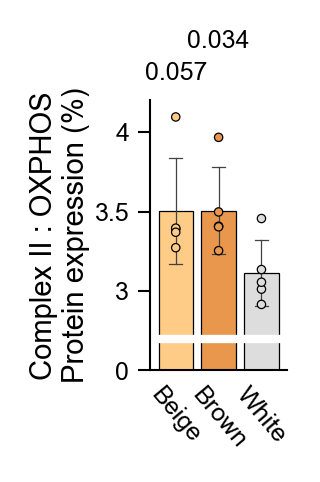

<Figure size 640x480 with 0 Axes>

In [12]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*3 +1/70*2]
height_ratios = [0.9]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=plot_data, x="Celltype", y="CII subunits",
            palette=['#FFCC88','#E8974D','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=plot_data, x="Celltype", y="CII subunits",
              palette=['#FFCC88','#E8974D','#DDDDDD'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)
ax.axhline(2.7, c='w', lw=2, clip_on=False)

ax.set_xlim(-0.6, 2.6)
ax.set_ylim(2.5, 4.2)
ax.set_xticks([0,1,2])
ax.set_yticks([2.5, 3, 3.5, 4])
ax.set_xticklabels(celltypes, rotation=-50)
ax.set_yticklabels([0, 3, 3.5, 4])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Complex II : OXPHOS\nProtein expression (%)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# Unpaired T-test
from scipy import stats
stat, pv = stats.ttest_ind([data['Beige_'+rep]['CII subunits'] for rep in reps],
                           [data['White_'+rep]['CII subunits'] for rep in reps])
ax.text(0, 4.3,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)
stat, pv = stats.ttest_ind([data['Brown_'+rep]['CII subunits'] for rep in reps],
                           [data['White_'+rep]['CII subunits'] for rep in reps])
ax.text(1, 4.5,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)


plt.savefig('Martinez_OXPHOS_PT_Exp-ratio_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()